In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math

import pypsa

%matplotlib inline

In [21]:
nw = pypsa.Network()

cur_path = r"C:\Users\janni\OneDrive\TU Berlin\4 - Abschlussarbeiten\01 - Bachelorarbeit\modell\data\\"

ex1 = pd.ExcelFile(cur_path + "map_cities.xlsx")
ex2 = pd.ExcelFile(cur_path + "map_countries.xlsx")

Load city- and country-buses

In [3]:
df_cities = pd.read_excel(ex1, sheetname="buses", header=0, parse_cols="B:D")
df_countries = pd.read_excel(ex2, sheetname="buses", header=0, parse_cols="B:D")
df_buses = df_cities.append(df_countries).reset_index(drop=True)

In [4]:
df_buses

,name,x,y
0,"Mecklenburg-Vorpommertn, Schleswig-Holstein",12.43,53.61
1,"Berlin, Brandenburg",13.40,52.52
2,"Hamburg, Bremen, Niedersachsen",9.99,53.55
3,Nordrhein-Westfalen (Köln),6.96,50.94
4,"Rheinland-Pfalz, Saarland",7.31,50.12
5,Hessen,9.16,50.65
6,Baden-Würtemberg (Stuttgart),9.18,48.76
7,Bayern (München),11.58,48.14
8,"Sachsen, Sachen-Anhalt, Thüringen",13.20,51.11
9,Skandinavien,9.62,56.00


In [19]:
[i for i, s in enumerate(df_buses["name"]) if "Rhein" in s][0]

4

Load lines between buses

In [5]:
df_cities_lines = pd.read_excel(ex1, sheetname="lines", header=0, parse_cols="B:D")
df_countries_lines = pd.read_excel(ex2, sheetname="lines", header=0, parse_cols="B:D")
df_lines = df_cities_lines.append(df_countries_lines).reset_index(drop=True)

Calculating the length of each line by Pythagoras.
The factor enables converting the distance in lattitude/longitude to kilometers

In [6]:
df_lines["length"] = 0
factor_coords_to_km = 111

for i in range(len(df_lines)):
    x_val = df_buses["x"][df_lines["bus0"][i]] - df_buses["x"][df_lines["bus1"][i]]
    y_val = df_buses["y"][df_lines["bus0"][i]] - df_buses["y"][df_lines["bus1"][i]]
    df_lines.at[i, "length"] = (math.sqrt(x_val**2 + y_val**2) * factor_coords_to_km)

In [8]:
pypsa.io.import_components_from_dataframe(nw, df_buses, "Bus")

In [9]:
pypsa.io.import_components_from_dataframe(nw, df_lines, "Line")

(<matplotlib.collections.PathCollection at 0x2597f81c6a0>,
 <matplotlib.collections.LineCollection at 0x2597f81ccc0>)

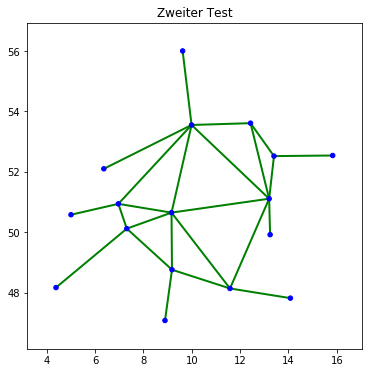

In [10]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(6,6)

nw.plot(bus_sizes=20, title="Zweiter Test")